In [1]:
import sys
sys.path.insert(0, '..')
import numpy as np
from src.models.perf_utils import *

In [2]:
a=np.array([[0,0,0,1,1,1,0,0],[1,1,1,0,0,0,1,1]]).transpose()
b=np.array([[0.4,0.1,0.1,0.8,0.8,0.7,0.2,0.9],[0.6,0.9,0.9,0.2,0.2,0.3,0.8,0.1]]).transpose()

In [3]:
help(framewiseAccuracy)

Help on function framewiseAccuracy in module src.models.perf_utils:

framewiseAccuracy(dataTrue, dataPred, trueIsCat, predIsCatOrProb, idxNotSeparation=array([], dtype=float64))
    Computes accuracy of predictions wrt annotations.
    
    Inputs:
        dataTrue: a numpy array of annotations, shape [timeSteps] (values are classes)
            or [timeSteps, nbClasses] (categorical data)
        dataPred: a numpy array of predictions, shape [timeSteps] (values are classes),
            or [timeSteps, nbClasses] (probabilities or categorical)
        trueIsCat, predIsCatOrProb: bool
        idxNotSeparation: binary vector indicating where separations are (0)
    
    Outputs:
        a single accuracy value



In [4]:
framewiseAccuracy(a,b,True,True)

0.875

In [5]:
framewisePRF1(a,b,True,True)

(1.0, 0.8, 0.888888888888889)

In [6]:
len(np.array([1,1,1]).shape)

1

In [7]:
b

array([[0.4, 0.6],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.2, 0.8],
       [0.9, 0.1]])

In [8]:
valuesConsecutive(a,True)

[(1, 0, 3, 3), (1, 6, 8, 2)]

In [9]:
t = np.arange(100)
yBinaryTrue = np.zeros(100)
yBinaryTrue[6:28+1] = 1 #u1
yBinaryTrue[52:56+1] = 1 #u2
yBinaryTrue[71:80+1] = 1 #u3
yBinaryTrue[85:89+1] = 1 #u4
yBinaryPred = np.zeros(100)
yBinaryPred[10:16+1] = 1 #u1
yBinaryPred[26:36+1] = 1 #u2
yBinaryPred[51:58+1] = 1 #u3

In [13]:
step=0.001

pStarTp, pStarTr, rStarTp, rStarTr, fStarTp, fStarTr = prfStar(yBinaryTrue,yBinaryPred,False,False,step)
Ip, Ir, Ipr = integralValues(fStarTp, fStarTr, step=0.001)

In [14]:
pStarTp, pStarTr, rStarTp, rStarTr, fStarTp, fStarTr

(array([1.        , 1.        , 1.        , ..., 0.33333333, 0.33333333,
        0.33333333]),
 array([1.        , 1.        , 1.        , ..., 0.33333333, 0.33333333,
        0.33333333]),
 array([0.5 , 0.5 , 0.5 , ..., 0.25, 0.25, 0.25]),
 array([0.5 , 0.5 , 0.5 , ..., 0.25, 0.25, 0.25]),
 array([0.66666667, 0.66666667, 0.66666667, ..., 0.28571429, 0.28571429,
        0.28571429]),
 array([0.66666667, 0.66666667, 0.66666667, ..., 0.28571429, 0.28571429,
        0.28571429]))

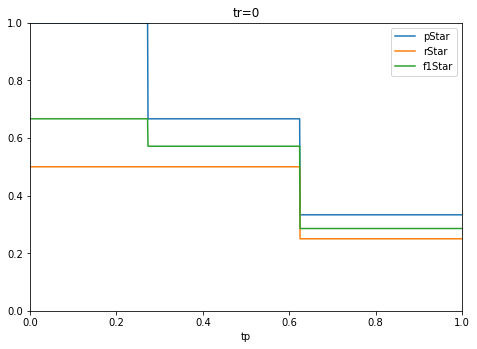

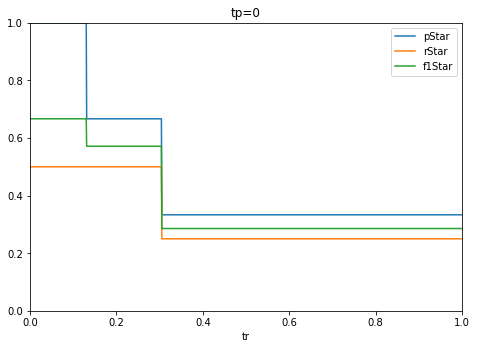

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
t = np.arange(0,1+step,step)
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(t,pStarTp,label='pStar')
ax.plot(t,rStarTp,label='rStar')
ax.plot(t,fStarTp,label='f1Star')
ax.set_title('tr=0')
ax.set_xlabel('tp')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.legend()
plt.show()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(t,pStarTr,label='pStar')
ax.plot(t,rStarTr,label='rStar')
ax.plot(t,fStarTr,label='f1Star')
ax.set_title('tp=0')
ax.set_xlabel('tr')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.legend()
plt.show()

In [16]:
Ip

0.49009523809523375

In [17]:
Ir

0.385142857142853

In [18]:
Ipr

0.43761904761904336

In [19]:
framewiseAccuracy(yBinaryTrue,yBinaryPred,False,False)

0.61

In [22]:
np.sum((1-yBinaryTrue)*yBinaryPred)

11.0